WARNING: This notebook may take a while to run all the cells.

In [1]:
import requests
url = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz'
r = requests.get(url, allow_redirects=True)
open('kddcup.data_10_percent.gz', 'wb').write(r.content)

2144903

Downloading the dataset. It will download the dataset in .gz format.

In [2]:
!gunzip /content/kddcup.data_10_percent.gz

Extracting the dataset.

In [3]:
!mv /content/kddcup.data_10_percent /content/kddcup.data_10_percent.csv

Changing the extension of the file to .csv

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing necessary libraries


In [5]:
names = ["duration", "protocol_type", "service", "flag", "src_bytes",
         "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
         "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
         "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
         "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
         "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
         "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
         "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
         "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
         "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label"]
data = pd.read_csv("kddcup.data_10_percent.csv", names=names)

Loading the dataset

In [6]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
pd.set_option('precision', 3)
data1 = data
data1 = data1.drop('protocol_type', axis=1)
data1 = data1.drop('service', axis=1)
data1 = data1.drop('flag', axis=1)
data1 = data1.drop('label', axis=1)

Making a copy of the dataset with all numerical values.

Lets check the correlation between the features in the dataset.


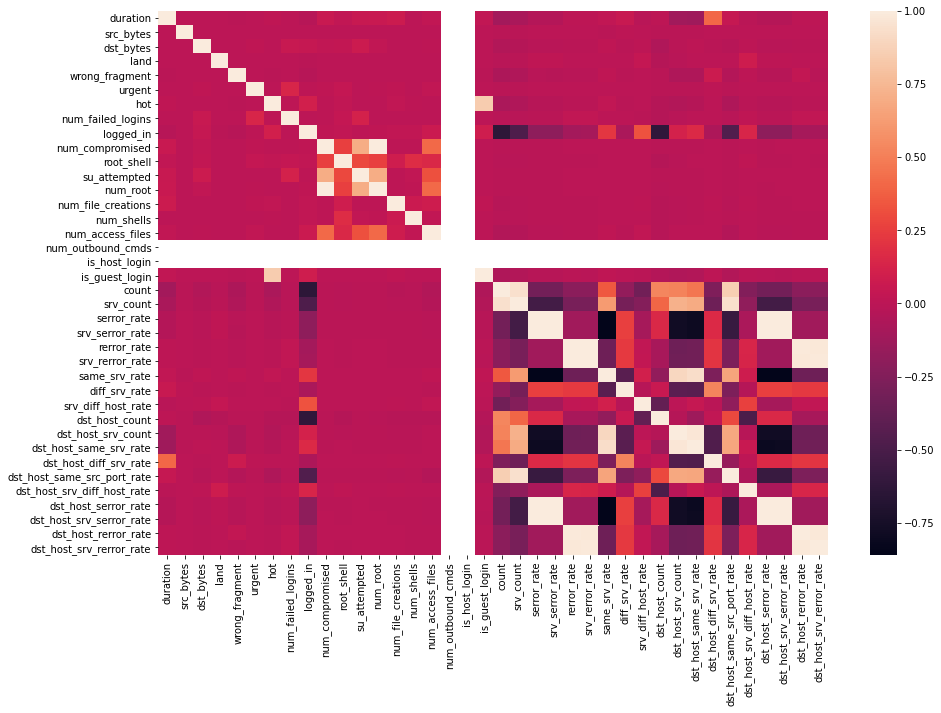

In [8]:
cor = data1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=False)
plt.show()

Now I'll select the highly correlated features and drop them.

In [9]:
x = list(cor.columns)
g = []

for i in x:
    for j in x[:x.index(i)]:
        if cor[i][j] >= 0.7:
            g.append((i, j))
o, c = [], 0
for i in g:
    for v in o:
        if i[0] in [x for x in v] or i[1] in [x for x in v]:
            c += 1
    if c == 0:
        s = {i[0], i[1]}
        for j in g[g.index(i) + 1:]:
            if i[0] == j[0] or i[0] == j[1] or i[1] == j[0] or i[1] == j[1]:
                s.add(j[0])
                s.add(j[1])

        o.append(s)
    c = 0
b = []
listd = set(b)
for i in o:
    for j in list(i)[:-1]:
        listd.add(j)        # listd is the set of correlated columns

for i in listd:
    data = data.drop(i, axis=1)     # droppped the correlated columns


In [10]:
# Converting Categorical data to numerical

dataX = data.values[:, :data.shape[1] - 1]
dataY = data.values[:, data.shape[1] - 1]
dataY1 = dataY
dataX[:, 1] = LabelEncoder().fit_transform(dataX[:, 1])
dataX[:, 2] = LabelEncoder().fit_transform(dataX[:, 2])
dataX[:, 3] = LabelEncoder().fit_transform(dataX[:, 3])
dataY = LabelEncoder().fit_transform(dataY)
label = {}

In [11]:
# Storing the label in a dictionary of label as key and value as encoded form of that label.
for i in range(len(dataY1)):
    label[dataY[i]] = dataY1[i]

In [12]:
from sklearn.model_selection import cross_val_score

Creating a function ***acuu*** which will contain all the classifiers. You can add more classifiers in it.<br>
This function splits the data in training and validation set.<br>
Also it Normalizes the dataset.

In [13]:
def acuu(x, y):
    l = []
    k = []
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.33, random_state=7)
    fit = Normalizer().fit(x_train)
    x_train = fit.fit_transform(x_train)
    x_val = fit.transform(x_val)



    # MODEL-1) Linear SVC
    # ------------------------------------------
    from sklearn.svm import LinearSVC

    linear_svc = LinearSVC()
    linear_svc.fit(x_train, y_train)
    y_pred = linear_svc.predict(x_val)
    acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
    print("MODEL-1: Accuracy of LinearSVC : ", acc_linear_svc)
    l.append(acc_linear_svc)
    acc_linear_svck = cross_val_score(linear_svc, x_val, y_val, cv=10, scoring='accuracy')
    print("MODEL-1: Accuracy of Support Vector Machines by k-fold : ", round(acc_linear_svck.mean() *100, 2))
    k.append(round(acc_linear_svck.mean() *100, 2))

    # MODEL-2) Perceptron
    # ------------------------------------------
    from sklearn.linear_model import Perceptron

    perceptron = Perceptron()
    perceptron.fit(x_train, y_train)
    y_pred = perceptron.predict(x_val)
    acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
    print("MODEL-2: Accuracy of Perceptron : ", acc_perceptron)
    l.append(acc_perceptron)
    acc_perceptronk = cross_val_score(perceptron, x_val, y_val, cv=10, scoring='accuracy')
    print("MODEL-2: Accuracy of Support Vector Machines by k-fold : ", round(acc_perceptronk.mean() * 100, 2))
    k.append(round(acc_perceptronk.mean() * 100, 2))

   
    # MODEL-3) KNN or k-Nearest Neighbors
    # ------------------------------------------
    from sklearn.neighbors import KNeighborsClassifier

    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_val)
    acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
    print("MODEL-3: Accuracy of k-Nearest Neighbors : ", acc_knn)
    l.append(acc_knn)
    acc_knnk = cross_val_score(knn, x_val, y_val, cv=10, scoring='accuracy')
    print("MODEL-3: Accuracy of Support Vector Machines by k-fold : ", round(acc_knnk.mean() * 100, 2))
    k.append(round(acc_knnk.mean() * 100, 2))

    # MODEL-4) Stochastic Gradient Descent
    # ------------------------------------------
    from sklearn.linear_model import SGDClassifier

    sgd = SGDClassifier()
    sgd.fit(x_train, y_train)
    y_pred = sgd.predict(x_val)
    acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
    print("MODEL-4: Accuracy of Stochastic Gradient Descent : ", acc_sgd)
    l.append(acc_sgd)
    acc_sgdk = cross_val_score(sgd, x_val, y_val, cv=10, scoring='accuracy')
    print("MODEL-4: Accuracy of Support Vector Machines by k-fold : ", round(acc_sgdk.mean() * 100, 2))
    k.append(round(acc_sgdk.mean() * 100, 2))

   
    # MODEL-5) XGBoost
    from xgboost import XGBClassifier
    classifier = XGBClassifier()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_val)
    acc_xgb=round(accuracy_score(y_pred, y_val) * 100, 2)
    print("MODEL-5: Accuracy of XGBoost : ", acc_xgb)
    l.append(acc_xgb)
    acc_xgbk = cross_val_score(classifier, x_val, y_val, cv=10, scoring='accuracy')
    print("MODEL-5: Accuracy of Support Vector Machines by k-fold : ", round(acc_xgbk.mean() * 100, 2))
    k.append(round(acc_xgbk.mean() * 100, 2))

    classifiers=['LinearSVC', 'Perceptron','KNeighborsClassifier','SGDClassifier','XGBoost']
    plt.bar(classifiers, l, color=['b','m','g','y','maroon','cyan'])
    plt.xticks(classifiers, rotation='vertical')
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracies')
    plt.title("Accuracy_Score()")
    plt.show()
    l = []
    plt.bar(classifiers, k, color=['b', 'm', 'g', 'y', 'maroon', 'cyan'])
    plt.xticks(classifiers, rotation='vertical')
    plt.xlabel('Classifiers')
    plt.ylabel('Accuracies')
    plt.title("KFolds10")
    plt.show()
    k=[]



In [ ]:
acuu(dataX,dataY)

Using following Feature Selection algorithms to select 17 best features and then fitting them to all classifiers.


1.   Univariate Feature Selection
2.   Recursive Feature Elimination (RFE)
3. Principal Component Analysis (PCA)
4. Linear Disriminant Analysis (LDA)




In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=17)        # k is number of features
fit = test.fit(dataX, dataY)
train2 = test.transform(dataX)
acuu(train2, dataY)
#
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, 17)
fit = rfe.fit(dataX, dataY)
train2 = fit.transform(dataX)
acuu(train2, dataY)

from sklearn.decomposition import PCA

pca = PCA(17)
fit = pca.fit(dataX, dataY)
train2 = pca.transform(dataX)
acuu(train2, dataY)

import warnings

warnings.filterwarnings("ignore")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=17)
fit = lda.fit_transform(dataX, dataY)
train3 = lda.transform(dataX)
# fit = lda.fit(X=dataX, y=dataY)
# train2 = fit.fit_transform(dataX)
print(train3.shape)
acuu(train3, dataY)

Using following Feature Selection algorithms to select 11 best features and then fitting them to all classifiers.


1.   Univariate Feature Selection
2.   Recursive Feature Elimination (RFE)
3. Principal Component Analysis (PCA)
4. Linear Disriminant Analysis (LDA)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=11)        # k is number of features
fit = test.fit(dataX, dataY)
train2 = test.transform(dataX)
acuu(train2, dataY)
#
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, 11)
fit = rfe.fit(dataX, dataY)
train2 = fit.transform(dataX)
acuu(train2, dataY)

from sklearn.decomposition import PCA

pca = PCA(11)
fit = pca.fit(dataX, dataY)
train2 = pca.transform(dataX)
acuu(train2, dataY)

import warnings

warnings.filterwarnings("ignore")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=11)
fit = lda.fit_transform(dataX, dataY)
train3 = lda.transform(dataX)
# fit = lda.fit(X=dataX, y=dataY)
# train2 = fit.fit_transform(dataX)
print(train3.shape)
acuu(train3, dataY)

Using all Feature Selection Algorithm in a sequence to get best 11 features.<br>
The Sequence is:<br>
Univariate --> RFE --> PCA --> LDA

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=23)        # k is number of features
fit = test.fit(dataX, dataY)
train2 = test.transform(dataX)
# acuu(train2, dataY)
#
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(train2, dataY)
train3 = fit.transform(train2)
# acuu(train2, dataY)

from sklearn.decomposition import PCA

pca = PCA(16)
fit = pca.fit(train3, dataY)
train4 = pca.transform(train3)
# acuu(train2, dataY)

import warnings

warnings.filterwarnings("ignore")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=11)
fit = lda.fit_transform(train4, dataY)
train5 = lda.transform(train4)
# fit = lda.fit(X=dataX, y=dataY)
# train2 = fit.fit_transform(dataX)
print(train5.shape)
acuu(train5, dataY)


Using RFE and LDA in a sequence to get best 11 features.<br>
RFE --> LDA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression()
rfe = RFE(model, 17)
fit = rfe.fit(dataX, dataY)
train2 = fit.transform(dataX)
print("RFE")


import warnings

warnings.filterwarnings("ignore")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=11)
fit = lda.fit_transform(train2, dataY)
train3 = lda.transform(train2)
# fit = lda.fit(X=dataX, y=dataY)
# train2 = fit.fit_transform(dataX)
print(train3.shape)
acuu(train3, dataY)